In [15]:
!pip3 install matplotlib

Looking in indexes: http://mirrors.cloud.aliyuncs.com/pypi/simple/
    100% |████████████████████████████████| 12.4MB 76.4MB/s ta 0:00:01                            | 839kB 67.4MB/s eta 0:00:01�████████████████              | 7.0MB 66.0MB/s eta 0:00:01    86% |███████████████████████████▊    | 10.7MB 64.4MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 60.8MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 60.4MB/s ta 0:00:01
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [34]:
# 导入必须的包import warningswarnings.filterwarnings('ignore')  
# 防止警告文件的包import pandas as pd  
# 数据分析包import osimport matplotlib.pyplot as plt 
# 可视化包import matplotlib%matplotlib inlineimport seaborn as sns  
# 可视化包from time import timefrom sklearn.preprocessing import scale  
# 标准化操作from sklearn.model_selection import train_test_split  
# 将数据集分成测试集和训练集from sklearn.metrics import f1_score  
# F1得分import xgboost as xgb  # XGBoost模型from sklearn.svm import SVC  
## 支持向量机分类模型from sklearn.linear_model import LogisticRegression  
# 逻辑回归模型from sklearn.model_selection import GridSearchCV  
# 超参数调参模块from sklearn.metrics import make_scorer  
# 模型评估import joblib  
# 模型的保存与加载模块
import matplotlib as mpl
mpl.matplotlib_fname()

'/usr/local/python3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
import pandas as pd
import numpy as np

左脚      44.0
右脚     211.0
左右脚     16.0
dtype: float64


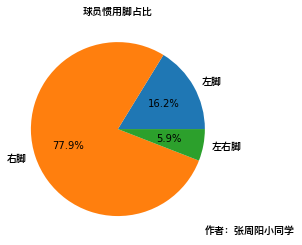

In [24]:

df = pd.read_csv("中超球员信息（30以下）.csv",encoding="gbk")
# print(df.head())


# 取出惯用脚中不为Nan的所有数据  Serrise对象.to_frame()  ==> dataframe对象
df = df["惯用脚"][df["惯用脚"].notnull()].to_frame()

#统计分类的列表
foot_list = df["惯用脚"].str.split(",").tolist()  #[[],[],[]]
# print(foot_list)
foot_l = ['左脚','右脚','左右脚']

zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(foot_l))),columns=foot_l)
# print(zeros_df)
# print(df.shape[0])
for i in range(df.shape[0]):
    #zeros_df.loc[0,["Sci-fi","Mucical"]] = 1
#     print(i, foot_list[i])
    zeros_df.loc[i,foot_list[i]] = 1
# print(zeros_df)
foot_count = zeros_df.sum(axis=0)
print(foot_count)

#解决汉字乱码问题
my_font = font_manager.FontProperties(fname="PingFang.ttf")

labels = '左脚','右脚','左右脚'
sizes = [foot_count['左脚'],foot_count['右脚'],foot_count['左右脚']]
pie = plt.pie(sizes,labels=labels,autopct='%1.1f%%')
#图形中的文字无法通过rcParams设置
for font in pie[1]:
    font.set_fontproperties(font_manager.FontProperties(
        fname='PingFang.ttf'))
plt.title("球员惯用脚占比",fontproperties=my_font)
plt.text(1,-1.2,'作者：张周阳小同学',fontproperties=my_font)
plt.show()

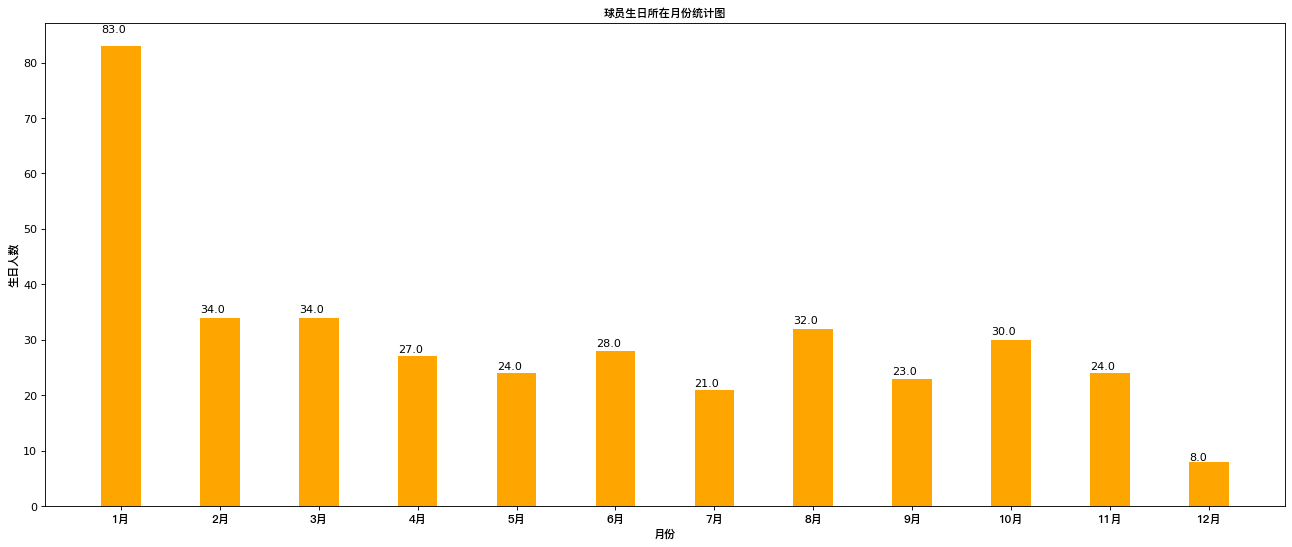

In [21]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
import pandas as pd
import numpy as np

#定义函数来显示柱状上的数值
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))



df = pd.read_csv("中超球员信息（30以下）.csv",encoding="gbk")
# print(df.head())
# df = df.dropna(how='any')
# 取出生日中不为Nan的所有数据  Serrise对象.to_frame()  ==> dataframe对象
df = df["生日"][df["生日"].notnull()].to_frame()

#统计分类的列表
birth_list = df["生日"].str.split(",").tolist()  #[[],[],[]]
# print(birth_list)
birth_list = [i[0].split("/")[1] for i in birth_list]
# print(birth_list)
birth_l = range(1, 13)
birth_l = [str(i) for i in birth_l]
# print(birth_l)

zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(birth_l))),columns=birth_l)
# print(zeros_df)
# print(df.shape[0])
for i in range(df.shape[0]):
    #zeros_df.loc[0,["Sci-fi","Mucical"]] = 1
    # print(i, birth_list[i])
    zeros_df.loc[i, birth_list[i]] = 1
# print(zeros_df)
birth_count = zeros_df.sum(axis=0)
# print(birth_count)
#
# #解决汉字乱码问题
my_font = font_manager.FontProperties(fname="PingFang.ttf")

# birth_count = birth_count.sort_values()
_x = birth_count.index
_y = birth_count.values
# print(_x)
# print(_y)
# print(type(_x))
# print(type(_y))


birth_x_list = []
for i in birth_count.index:
    birth_x_list.append(i+"月")
birth_tuple = tuple(birth_x_list)

plt.figure(figsize=(20,8),dpi=80)
b = plt.bar(range(len(_x)),_y,width=0.4,color="orange")
autolabel(b)
plt.xlabel("月份", fontproperties=my_font)
plt.ylabel("生日人数", fontproperties=my_font)
plt.title("球员生日所在月份统计图", fontproperties=my_font)
plt.xticks(range(len(_x)), birth_tuple, fontproperties=my_font)
plt.show()





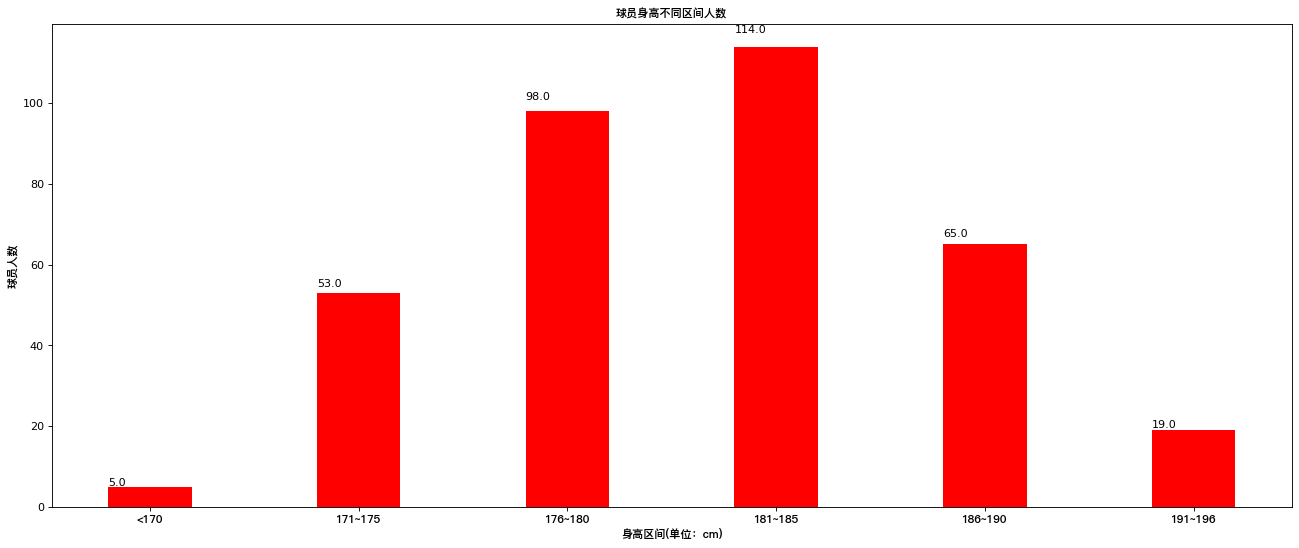

In [22]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
import pandas as pd
import numpy as np

#定义函数来显示柱状上的数值
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))


df = pd.read_csv("中超球员信息（30以下）.csv", encoding="gbk")


# print(df.head())
# df = df.dropna(how='any')
# 取出身高中不为Nan的所有数据  Serrise对象.to_frame()  ==> dataframe对象
df = df["身高"][df["身高"].notnull()].to_frame()
# 各个区间写死
a = df[df["身高"] < 170]
b = df[(df["身高"] >= 170) & (df["身高"] <= 175)]
c = df[(df["身高"] >= 176) & (df["身高"] <= 180)]
d = df[(df["身高"] >= 181) & (df["身高"] <= 185)]
e = df[(df["身高"] >= 186) & (df["身高"] <= 190)]
f = df[(df["身高"] >= 191) & (df["身高"] <= 196)]



# #解决汉字乱码问题
my_font = font_manager.FontProperties(fname="PingFang.ttf")

_y = np.array([a.shape[0], b.shape[0], c.shape[0], d.shape[0], e.shape[0], f.shape[0]])

height_tuple = ("<170", "171~175", "176~180", "181~185", "186~190", "191~196")
plt.figure(figsize=(20,8),dpi=80)
b = plt.bar(range(6), _y, width=0.4,color="red")
autolabel(b)
plt.xlabel("身高区间(单位：cm)", fontproperties=my_font)
plt.ylabel("球员人数", fontproperties=my_font)
plt.title("球员身高不同区间人数", fontproperties=my_font)
plt.xticks(range(6), height_tuple, fontproperties=my_font)
plt.show()





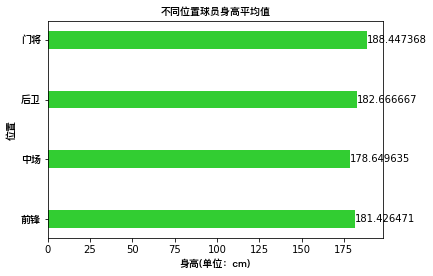

In [23]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
import pandas as pd
import numpy as np

#定义函数来显示柱状上的数值
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))


df = pd.read_csv("中超球员信息（30以下）.csv", encoding="gbk")


# print(df.head())
# df = df.dropna(how='any')
# 取出位置和身高中不为Nan的所有数据  Serrise对象.to_frame()  ==> dataframe对象
df = df[["位置", "身高"]][df["位置"].notnull()][df["身高"].notnull()]

# print(df)


#统计分类的列表
locations_list = df["位置"].str.split(",").tolist()  #[[],[],[]]
# print(locations_list)
location_list = list(set([i[0] for i in locations_list]))
# print(location_list)

height_avg_list = []
for location in location_list:
    height_avg_dict = {}
    height_avg_dict[location] = df[df["位置"] == location]["身高"].mean()
    height_avg_list.append(height_avg_dict)

# print(height_avg_list)



# # #解决汉字乱码问题
my_font = font_manager.FontProperties(fname="PingFang.ttf")



_x = tuple([list(height_dict.keys())[0] for height_dict in height_avg_list])
_y = [height_dict[list(height_dict.keys())[0]] for height_dict in height_avg_list]
# print(_x)
# print(_y)
#图像绘制
fig,ax=plt.subplots()
b=ax.barh(range(len(_x)),_y,color='#32CD32',height=0.3, align='center')
#添加数据标签
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%f'% w,ha='left',va='center')

#设置Y轴刻度线标签
ax.set_yticks(range(len(_x)))
#font=FontProperties(fname=r'/Library/Fonts/Songti.ttc')
ax.set_yticklabels(_x,fontproperties=my_font)
ax.set_xlabel('身高(单位：cm)',fontproperties=my_font)
ax.set_ylabel('位置',fontproperties=my_font)
ax.set_title('不同位置球员身高平均值',fontproperties=my_font)
plt.show()







In [6]:
data = pd.read_csv("预测数据表.csv")
data.head()

,红黄牌,出场,场均关键传球,创造绝佳机会,场均争顶成功,评分,进球,场均射门,场均射正,把握机会能力,...,进球率,把握机会能力.1,传球成功率.1,前场传球成功率.1,中场传球成功率,后场传球成功率,传中成功率,长传成功率,直塞成功率,致命失误/失误
0,2,28(1),1.6,9,1.1,7.66,19,2.7,1.2,70%,...,24%,70%,89%,75%,94%,97%,27%,64%,40%,-
1,1,16(2),1,3,1,7.49,11,5.1,2.1,56%,...,12%,56%,80%,73%,87%,91%,11%,77%,-,-
2,0,1,-,-,-,6.08,-,-,-,-,...,-,-,50%,-,100%,-,-,-,-,-
3,0,9(4),1.6,4,1,7.76,10,2.8,1.5,78%,...,28%,78%,83%,79%,86%,100%,25%,80%,-,-
4,1,10,2.4,6,0.3,7.12,2,2,0.5,50%,...,10%,50%,84%,77%,89%,91%,19%,68%,-,-


In [7]:
data = data[[
    "场均射门",
    "场均射正",
    "场均过人",
    "场均抢断",
    "场均解围",
    "场均传球",
    "传球成功率",
    "把握机会能力",
    "评分"
]]
data

,场均射门,场均射正,场均过人,场均抢断,场均解围,场均传球,传球成功率,把握机会能力,评分
0,2.7,1.2,1.9,0.8,0.8,47.2,89%,70%,7.66
1,5.1,2.1,1.1,0.6,0.5,26.8,80%,56%,7.49
2,-,-,-,-,-,2,50%,-,6.08
3,2.8,1.5,0.9,0.5,0.8,15.6,83%,78%,7.76
4,2,0.5,2.3,0.7,0.1,32.9,84%,50%,7.12
...,...,...,...,...,...,...,...,...,...
386,0.4,0.1,0.1,0.6,4.1,24.5,83%,-,6.21
387,0.8,0.4,0.5,0.1,0.5,11.5,75%,-,6.15
388,-,-,-,0.3,0.3,3.8,60%,-,5.96
389,0.3,-,-,-,1.3,13,78%,-,5.78


In [8]:

data["场均射门"] = data["场均射门"].replace(to_replace="-", value=np.nan)
data["场均射正"] = data["场均射正"].replace(to_replace="-", value=np.nan)
data["场均过人"] = data["场均过人"].replace(to_replace="-", value=np.nan)
data["场均抢断"] = data["场均抢断"].replace(to_replace="-", value=np.nan)
data["场均解围"] = data["场均解围"].replace(to_replace="-", value=np.nan)
data["场均传球"] = data["场均传球"].replace(to_replace="-", value=np.nan)
data["传球成功率"] = data["传球成功率"].replace(to_replace="-", value=np.nan)
data["把握机会能力"] = data["把握机会能力"].replace(to_replace="-", value=np.nan)

In [9]:
data

,场均射门,场均射正,场均过人,场均抢断,场均解围,场均传球,传球成功率,把握机会能力,评分
0,2.7,1.2,1.9,0.8,0.8,47.2,89%,70%,7.66
1,5.1,2.1,1.1,0.6,0.5,26.8,80%,56%,7.49
2,NaN,NaN,NaN,NaN,NaN,2,50%,NaN,6.08
3,2.8,1.5,0.9,0.5,0.8,15.6,83%,78%,7.76
4,2,0.5,2.3,0.7,0.1,32.9,84%,50%,7.12
...,...,...,...,...,...,...,...,...,...
386,0.4,0.1,0.1,0.6,4.1,24.5,83%,NaN,6.21
387,0.8,0.4,0.5,0.1,0.5,11.5,75%,NaN,6.15
388,NaN,NaN,NaN,0.3,0.3,3.8,60%,NaN,5.96
389,0.3,NaN,NaN,NaN,1.3,13,78%,NaN,5.78


In [10]:
data['传球成功率'] = data['传球成功率'].str.strip('%').astype(float)/100
data['把握机会能力'] = data['把握机会能力'].str.strip('%').astype(float)/100

In [11]:
data


,场均射门,场均射正,场均过人,场均抢断,场均解围,场均传球,传球成功率,把握机会能力,评分
0,2.7,1.2,1.9,0.8,0.8,47.2,0.89,0.70,7.66
1,5.1,2.1,1.1,0.6,0.5,26.8,0.80,0.56,7.49
2,NaN,NaN,NaN,NaN,NaN,2,0.50,NaN,6.08
3,2.8,1.5,0.9,0.5,0.8,15.6,0.83,0.78,7.76
4,2,0.5,2.3,0.7,0.1,32.9,0.84,0.50,7.12
...,...,...,...,...,...,...,...,...,...
386,0.4,0.1,0.1,0.6,4.1,24.5,0.83,NaN,6.21
387,0.8,0.4,0.5,0.1,0.5,11.5,0.75,NaN,6.15
388,NaN,NaN,NaN,0.3,0.3,3.8,0.60,NaN,5.96
389,0.3,NaN,NaN,NaN,1.3,13,0.78,NaN,5.78


In [12]:
# data['场均射门'].fillna(data['场均射门'].mean(), inplace=True)

data['场均射门'].fillna(data['场均射门'].astype(float).mean(), inplace=True)
data['场均射正'].fillna(data['场均射正'].astype(float).mean(), inplace=True)
data['场均过人'].fillna(data['场均过人'].astype(float).mean(), inplace=True)
data['场均抢断'].fillna(data['场均抢断'].astype(float).mean(), inplace=True)
data['场均解围'].fillna(data['场均解围'].astype(float).mean(), inplace=True)
data['场均传球'].fillna(data['场均传球'].astype(float).mean(), inplace=True)
data['传球成功率'].fillna(data['传球成功率'].astype(float).mean(), inplace=True)
data['把握机会能力'].fillna(data['把握机会能力'].astype(float).mean(), inplace=True)



In [13]:
data = data.astype(float)

data


,场均射门,场均射正,场均过人,场均抢断,场均解围,场均传球,传球成功率,把握机会能力,评分
0,2.700000,1.200000,1.900000,0.800000,0.800000,47.2,0.89,0.700000,7.66
1,5.100000,2.100000,1.100000,0.600000,0.500000,26.8,0.80,0.560000,7.49
2,0.941796,0.420472,0.603797,1.115186,1.379228,2.0,0.50,0.624211,6.08
3,2.800000,1.500000,0.900000,0.500000,0.800000,15.6,0.83,0.780000,7.76
4,2.000000,0.500000,2.300000,0.700000,0.100000,32.9,0.84,0.500000,7.12
...,...,...,...,...,...,...,...,...,...
386,0.400000,0.100000,0.100000,0.600000,4.100000,24.5,0.83,0.624211,6.21
387,0.800000,0.400000,0.500000,0.100000,0.500000,11.5,0.75,0.624211,6.15
388,0.941796,0.420472,0.603797,0.300000,0.300000,3.8,0.60,0.624211,5.96
389,0.300000,0.420472,0.603797,1.115186,1.300000,13.0,0.78,0.624211,5.78


In [14]:
data.corr()["评分"]


场均射门      0.629791
场均射正      0.570813
场均过人      0.473701
场均抢断      0.155872
场均解围     -0.025825
场均传球      0.523851
传球成功率     0.070583
把握机会能力   -0.037119
评分        1.000000
Name: 评分, dtype: float64

In [15]:
data.columns.to_list()

['场均射门', '场均射正', '场均过人', '场均抢断', '场均解围', '场均传球', '传球成功率', '把握机会能力', '评分']

In [16]:
data.corr()["评分"].to_list()

[0.6297907273474265,
 0.5708128326118403,
 0.47370103363336563,
 0.15587179032619952,
 -0.025824756046760065,
 0.5238511810486077,
 0.070583083218821,
 -0.037118650171184174,
 1.0]

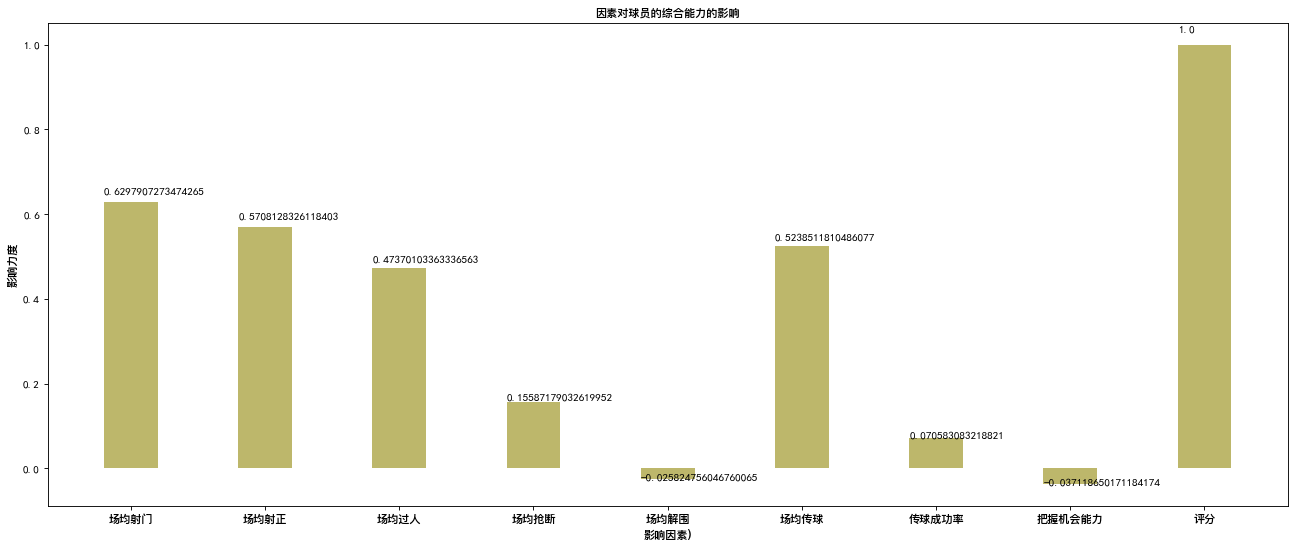

In [21]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib
import pandas as pd
import numpy as np

#定义函数来显示柱状上的数值
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))

        
# #解决汉字乱码问题
my_font = font_manager.FontProperties(fname="PingFang.ttf")


_y = np.array(data.corr()["评分"].to_list())


title_tuple = tuple(data.columns.to_list())
plt.figure(figsize=(20,8),dpi=80)
b = plt.bar(range(len(data.columns.to_list())), _y, width=0.4,color="#BDB76B")
autolabel(b)
plt.xlabel("影响因素)", fontproperties=my_font)
plt.ylabel("影响力度", fontproperties=my_font)
plt.title("因素对球员的综合能力的影响", fontproperties=my_font)
plt.xticks(range(len(data.columns.to_list())), title_tuple, fontproperties=my_font)
plt.show()
